# 🧪 Midterm Exam – Developing Notebook (Introduction to ML)

**Duration (suggested):** 90–120 minutes  
**Environment:** CPU-only; Python 3.8+; `numpy`, `pandas`, `matplotlib`, `scikit-learn`  

## Instructions
- Work through sections in order. Feel free to re-run cells as needed.
- Where you see **`# TODO:`**, fill in your code.
- Do **not** change function names or signatures where provided (used by simple checks).
- Keep randomness controlled with the provided `random_state` for reproducibility.
- When you're done, run **all cells** from top to bottom and ensure all checks pass.

## 📦 Setup

In [1]:
# You may import additional stdlib packages if needed, but avoid heavy dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_regression, make_moons
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## A. Conceptual (Short Answers)

Answer briefly in the Markdown cells below each question.

### A1. Supervised vs Unsupervised Learning  
**Q:** Define supervised and unsupervised learning with one example each.

*Your answer:*  

**Supervised learning** is a type of machine learning where the model is trained on labeled data. For example: Predicting house prices based on features like location and size.

**Unsupervised learning** involves training a model on unlabeled data. For example: Grouping customers into segments based on their shopping behavior/patterns.


### A2. Overfitting and Prevention  
**Q:** What is overfitting? List two prevention strategies and explain why they help.

*Your answer:*  

**Overfitting** occurs when a machine learning model learns the training data too well.

Ways to prevent:

**Regularization**: This technique adds a penalty to large or complex model parameters. It helps by simplifying the model and preventing it from fitting random noise in the data.

**Cross-validation**: This involves splitting the dataset into multiple parts and training/testing the model on different combinations. It helps ensure the model performs well across various subsets of data, improving its generalization to new data.


### A3. Distance Metrics  
**Q:** In Minkowski distance, what does the parameter **`p`** control? Give two special cases.

*Your answer:*

The parameter **p** controls the power or order of the distance calculation. it determines how the differences between coordinates are measured and combined.

**Special Cases**:

p = 1: This gives the Manhattan distance (also called L1 distance), which sums the absolute differences between coordinates.

p = 2: This gives the Euclidean distance (also called L2 distance), which measures the straight-line distance between two points.

## B. Analytical (By Hand / Small Code)

### B1. Distances in 2D
Compute Euclidean and Manhattan distances between points `A = (3, -2)` and `B = (-1, 5)`.

In [2]:
A = np.array([3, -2], dtype=float)
B = np.array([-1, 5], dtype=float)

# TODO: compute distances
euclidean = np.linalg.norm(A - B)  # or sqrt(((...)))

manhattan = np.abs(A - B).sum()

euclidean, manhattan

(np.float64(8.06225774829855), np.float64(11.0))

In [5]:
# Quick checks (not hidden)
assert euclidean > 0 and manhattan > 0
assert euclidean < manhattan  # In this case Euclidean should be less than Manhattan
print("✅ Distance sanity checks passed.")

✅ Distance sanity checks passed.


### B2. k-Fold Logic
Given scores from a 5-fold CV: `[0.82, 0.84, 0.80, 0.83, 0.81]`  
Compute the mean and standard deviation. Interpret whether this model is stable across folds.

In [6]:
scores = np.array([0.82, 0.84, 0.80, 0.83, 0.81], dtype=float)

mean_score = scores.mean()
std_score = scores.std(ddof=1)

print("Mean:", round(mean_score, 4))
print("Std Dev:", round(std_score, 4))

# Short interpretation:
if std_score < 0.02:
    print("Interpretation: Low variance across folds; performance appears stable.")
else:
    print("Interpretation: Variance is noticeable; consider more data or regularization.")

Mean: 0.82
Std Dev: 0.0158
Interpretation: Low variance across folds; performance appears stable.


### B3. Cost with Regularization (Conceptual)
**Q:** Show how adding an L2 regularization term modifies the linear regression cost function. What trade-off does this introduce?

*Your answer:*

Adding L2 regularization means we slightly change the cost function of linear regression by adding a penalty for large weights.

**Trade-Offs:**


*   It helps prevent overfitting (model too complex)
*   But it can cause underfitting if the penalty is too strong (model too simple).



## C. Practical – Regression & Classification

### C1. Linear Regression on Synthetic Data
1. Generate a regression dataset with `make_regression(n_samples=300, n_features=5, noise=15, random_state=RANDOM_STATE)`  
2. Split 80/20 train/test.  
3. Fit `LinearRegression()` and report **RMSE** on train and test.  
4. Briefly interpret whether the model under/over-fits.

In [7]:
# TODO: implement the regression experiment
X_reg, y_reg = make_regression(n_samples=300, n_features=5, noise=15, random_state=RANDOM_STATE)
Xtr, Xte, ytr, yte = train_test_split(X_reg, y_reg, test_size=0.2, random_state=RANDOM_STATE)

reg = LinearRegression()
reg.fit(Xtr, ytr)

pred_tr = reg.predict(Xtr)
pred_te = reg.predict(Xte)

rmse_tr = np.sqrt(mean_squared_error(ytr, pred_tr))
rmse_te = np.sqrt(mean_squared_error(yte, pred_te))

print(f"Train RMSE: {rmse_tr:.3f}")
print(f"Test  RMSE: {rmse_te:.3f}")

if abs(rmse_tr - rmse_te) < 2.0:
    print("Interpretation: Similar train/test RMSE → reasonable generalization.")
elif rmse_tr < rmse_te:
    print("Interpretation: Train RMSE much lower → potential overfitting.")
else:
    print("Interpretation: Test RMSE lower than train → potential underfitting or randomness.")

Train RMSE: 14.375
Test  RMSE: 14.811
Interpretation: Similar train/test RMSE → reasonable generalization.


### C2. Binary Classification + Decision Boundary
Use `make_moons(n_samples=400, noise=0.25, random_state=RANDOM_STATE)` and `LogisticRegression`.
1. Standardize features.  
2. Fit classifier and report accuracy.  
3. Plot decision boundary (meshgrid) and confusion matrix.

In [8]:
# Data
X_cls, y_cls = make_moons(n_samples=400, noise=0.25, random_state=RANDOM_STATE)
scaler = StandardScaler()
Xc = scaler.fit_transform(X_cls)
Xtr, Xte, ytr, yte = train_test_split(Xc, y_cls, test_size=0.25, random_state=RANDOM_STATE)

# Model
clf = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
clf.fit(Xtr, ytr)
pred = clf.predict(Xte)
acc = accuracy_score(yte, pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.800


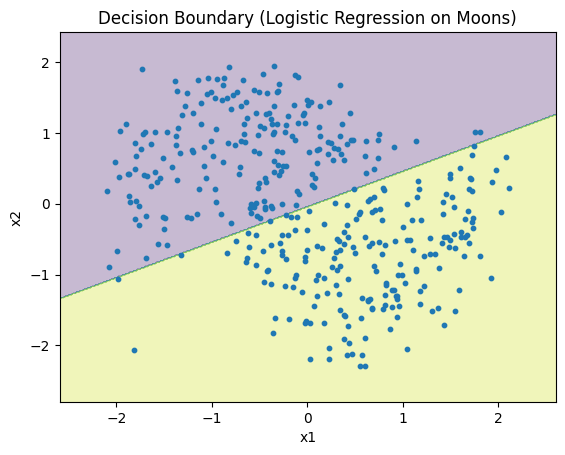

In [9]:
# Decision boundary plot (no custom colors as per instructions)
h = 0.02
x_min, x_max = Xc[:, 0].min() - 0.5, Xc[:, 0].max() + 0.5
y_min, y_max = Xc[:, 1].min() - 0.5, Xc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(Xc[:,0], Xc[:,1], s=10)
plt.title("Decision Boundary (Logistic Regression on Moons)")
plt.xlabel("x1"); plt.ylabel("x2");
plt.show()

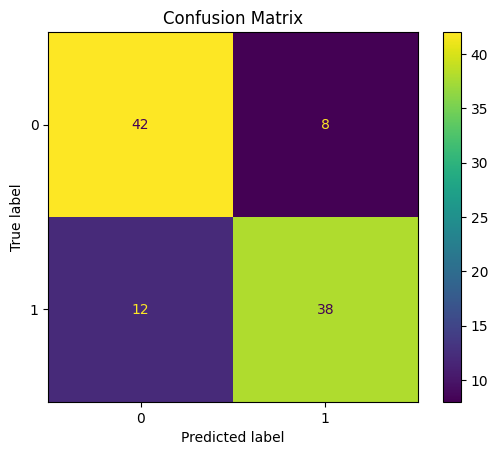

In [10]:
# Confusion matrix
cm = confusion_matrix(yte, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()